In [7]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import cm
import matplotlib as plt

In [2]:
fruits=pd.read_table('fruit.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [5]:
fruits.shape

(59, 7)

C:\Users\User\AppData\Local\Temp\ipykernel_14096\905274876.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


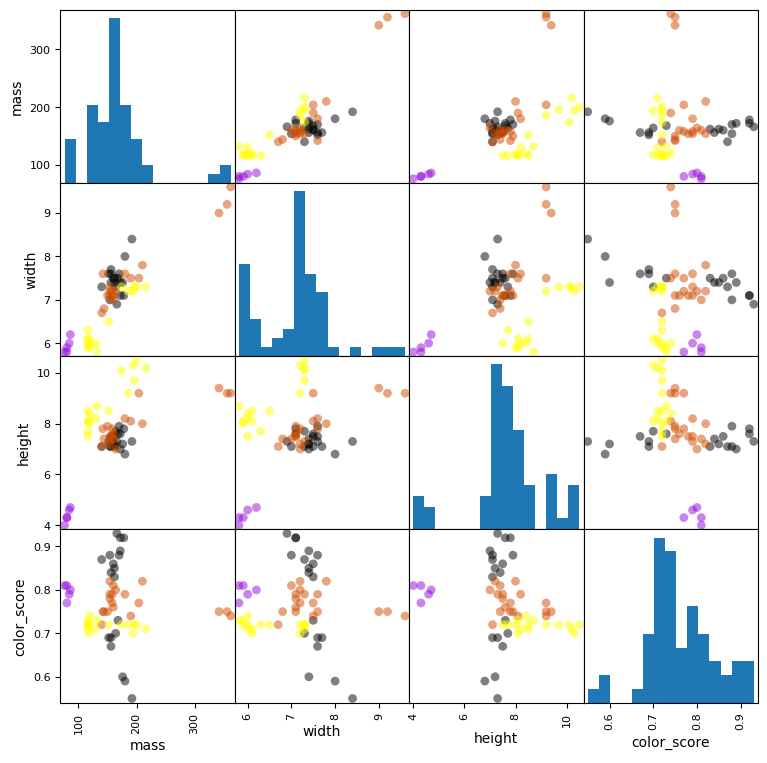

In [12]:
feature_names = ['mass', 'width', 'height', 'color_score']
x = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(x, c = y, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)



In [16]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_test.shape

(12, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[0.29285714, 0.38235294, 0.53846154, 0.64864865],
       [0.37142857, 0.52941176, 0.64615385, 0.64864865],
       [0.40714286, 0.5       , 0.63076923, 0.51351351],
       [0.27857143, 0.41176471, 0.49230769, 0.72972973],
       [0.35      , 0.44117647, 0.93846154, 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.27142857, 0.52941176, 0.50769231, 0.37837838],
       [0.31428571, 0.41176471, 0.46153846, 0.67567568],
       [0.2       , 0.        , 0.72307692, 0.48648649],
       [0.3       , 0.35294118, 0.52307692, 0.7027027 ],
       [0.27857143, 0.44117647, 0.50769231, 0.64864865],
       [0.14285714, 0.02941176, 0.63076923, 0.48648649],
       [0.30714286, 0.5       , 0.47692308, 0.75675676],
       [0.14285714, 0.14705882, 0.56923077, 0.45945946],
       [0.45714286, 0.5       , 0.8       , 0.59459459],
       [0.28571429, 0.55882353, 0.47692308, 0.37837838],
       [0.01428571, 0.        , 0.04615385, 0.59459459],
       [0.47857143, 0.58823529,

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
logreg.predict(X_train)

array([1, 1, 3, 1, 4, 2, 1, 1, 4, 1, 1, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4,
       3, 1, 3, 1, 4, 4, 4, 1, 1, 1, 4, 3, 2, 1, 1, 1, 1, 1, 4, 4, 1, 1,
       4, 4, 4], dtype=int64)

In [26]:
print(y_train)

30    3
41    3
33    3
42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64


In [27]:
logreg.score(X_train, y_train)

0.7659574468085106

In [28]:
logreg.predict(X_test)

array([3, 1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 3], dtype=int64)

In [29]:
logreg.score(X_test, y_test)

0.4166666666666667

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
dt.score(X_train, y_train)

1.0

In [32]:
dt.predict(X_train)

array([3, 3, 3, 3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4,
       1, 1, 3, 1, 4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1,
       4, 4, 4], dtype=int64)

In [33]:
dt.predict(X_test)

array([3, 3, 4, 1, 1, 1, 3, 4, 3, 1, 2, 1], dtype=int64)

In [34]:
y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
Name: fruit_label, dtype: int64

In [35]:
dt.score(X_test, y_test)

0.9166666666666666

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
kn.score(X_train, y_train)

0.9787234042553191

In [38]:
kn.score(X_test, y_test)

1.0

In [39]:
kn.predict(X_test)

array([3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1], dtype=int64)

In [40]:
y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
Name: fruit_label, dtype: int64